In [212]:
#install.packages("kknn")
#install.packages("caret")
#install.packages('naivebayes')
library(tidyverse);
library(kknn)
library(caret) #useful for confusionMatrix
library(naivebayes)

trainData = read.table("Wafer_TRAIN.txt", header = FALSE, sep = "", dec = ".")
testData = read.table("Wafer_TEST.txt", header = FALSE, sep = "", dec = ".") #reading txt files to data frame

trainData$V1 = as.factor(trainData$V1)
testData$V1 = as.factor(testData$V1) #convert response variable to be categorical nominal

dim(trainData)
dim(testData)

[1] 1000  153

[1] 6164  153

In [213]:
head(trainData)
head(testData)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1.6022936,-1.6708228,-1.6936659,-1.6993767,-1.6993767,-1.7036597,-1.7036597,-1.7036597,-1.7036597,⋯,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320,-1.1454320
2,1,1.0845914,1.0845914,1.0845914,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,⋯,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076,1.0653076
3,1,0.3626885,0.3626885,0.3626885,0.3933156,0.3626885,0.3626885,0.3626885,0.3626885,0.3626885,⋯,0.3933156,0.3933156,0.3933156,0.3626885,0.3933156,0.3933156,0.3933156,0.3933156,0.3933156,0.3933156
4,1,-1.0945235,-1.0945235,-1.0945235,-1.0967319,-1.0945235,-1.0967319,-1.0945235,-1.0945235,-1.0945235,⋯,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319,-1.0967319
5,1,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,⋯,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610,-1.1037610
6,1,0.4250210,0.4250210,0.4562153,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,⋯,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210,0.4250210


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,-1.079707,-1.083256,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,-1.079707,⋯,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068,-1.0797068
2,1,-1.080197,-1.078021,-1.078021,-1.078021,-1.078021,-1.078021,-1.080197,-1.078021,-1.078021,⋯,-1.1106696,-1.1128462,-1.1150228,-1.1171994,-1.1193760,-1.1215526,-1.1237292,-1.1259058,-1.1280824,-1.1302591
3,1,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,-1.154060,⋯,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601,-1.1540601
4,1,-1.658965,-1.696605,-1.705291,-1.711082,-1.711082,-1.715425,-1.715425,-1.715425,-1.715425,⋯,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818,-1.1493818
5,1,-1.201221,-1.199042,-1.199042,-1.201221,-1.199042,-1.199042,-1.199042,-1.199042,-1.199042,⋯,-1.1859678,-1.1837887,-1.1816096,-1.1794305,-1.1772515,-1.1750724,-1.1728933,-1.1707142,-1.1685351,-1.1663560
6,1,-1.488544,-1.519276,-1.527657,-1.533245,-1.537436,-1.537436,-1.537436,-1.533245,-1.537436,⋯,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258,-0.9968258


In [214]:
sum(trainData$V1=='-1')/nrow(trainData)
sum(testData$V1=='-1')/nrow(testData)

[1] 0.097

[1] 0.1078845

In [201]:
for(i in 2:ncol(trainData)){
  trainData[,i] = (trainData[,i] - min(trainData[,i]))/(max(trainData[,i])-min(trainData[,i]))
}
for(i in 2:ncol(testData)){
  testData[,i] = (testData[,i] - min(testData[,i]))/(max(testData[,i])-min(testData[,i]))
}
head(trainData,3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.1653769,0.2346507,0.2093497,0.2147464,0.2218085,0.2013754,0.2248545,0.1176004,0.05470156,⋯,0.08117956,0.08654791,0.1068764,0.1281702,0.1443307,0.1653768,0.1765412,0.1996616,0.2028182,0.2353417
2,1,0.9295249,0.9363859,0.9352538,0.9303544,0.9314444,0.9346653,0.8735742,0.7895420,0.76127811,⋯,0.84843695,0.84133762,0.8381368,0.8335048,0.8319988,0.8261506,0.8273928,0.8183575,0.8255695,0.8066515
3,1,0.7242163,0.7525353,0.7466348,0.7564167,0.7510969,0.7485947,0.7089631,0.6190384,0.58198595,⋯,0.61521598,0.61190641,0.6158577,0.6093348,0.6229704,0.6252972,0.6295554,0.6302943,0.6362736,0.6329922


In [202]:
kvec = 1:50
nk=length(kvec)

inMISS = rep(0,nk) #pre-allocating misclassification for in-sample data
outMISS = rep(0,nk) #pre-allocating misclassification for out-of-sample data

for(i in 1:nk){
    kmodtr = kknn(V1 ~., train=trainData, test=trainData, k=i, kernel="rectangular")
    kmod = kknn(V1 ~., train=trainData, test=testData, k=i, kernel="rectangular")

     #Instead of RSME, we can use the misclassification rate
     inMISS[i] = (table(trainData$V1,kmodtr$fitted.values)[2]+table(trainData$V1,kmodtr$fitted.values)[1,2])/sum(table(trainData$V1,kmodtr$fitted.values))
     outMISS[i] = (table(testData$V1,kmod$fitted.values)[2]+table(testData$V1,kmod$fitted.values)[1,2])/sum(table(testData$V1,kmod$fitted.values))
    }

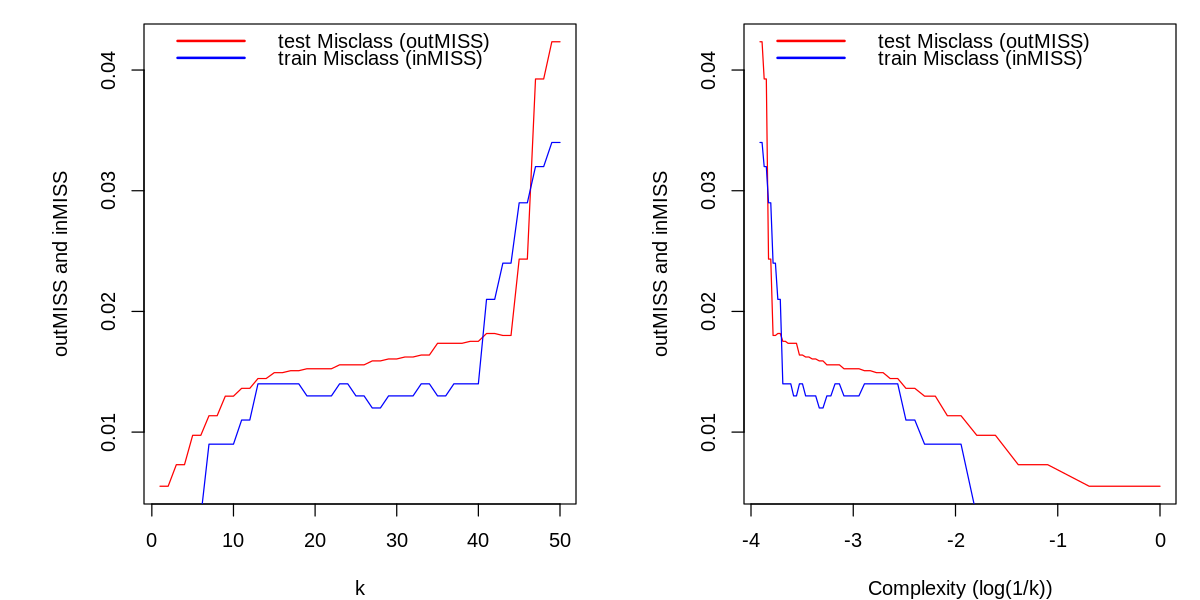

In [203]:
# Change plot size
options(repr.plot.width=10, repr.plot.height=5)

#make plot consist of two subplots in a row
par(mfrow=c(1,2),mar=c(4,6,1,1))

plot(kvec,outMISS,type="l",
     xlab="k",ylab="outMISS and inMISS",
     col="red",ylim=range(outMISS))
lines(kvec,inMISS,col="blue")
legend(x = "topleft",          # Position
       legend = c("test Misclass (outMISS)", "train Misclass (inMISS)"),  # Legend texts
       lty = c(1, 1),           # Line types
       col = c("red", "blue"),           # Line colors
       lwd = 2,                 # Line width
       bty = "n")   # boundary type

plot(log(1/kvec),outMISS,type="l",
     xlab="Complexity (log(1/k))",ylab="outMISS and inMISS",
     col="red",ylim=range(outMISS))
lines(log(1/kvec),inMISS,col="blue")
legend(x = "topleft",          # Position
       legend = c("test Misclass (outMISS)", "train Misclass (inMISS)"),  # Legend texts
       lty = c(1, 1),           # Line types
       col = c("red", "blue"),           # Line colors
       lwd = 2,                 # Line width
       bty = "n")   # boundary type

In [204]:
kbest = which.min(outMISS)
kbest

kmodbest = kknn(V1 ~., train=trainData, test=testData, k=kbest, kernel="rectangular")

confusionMatrix(kmodbest$fitted.values, testData$V1)

[1] 1

Confusion Matrix and Statistics

          Reference
Prediction   -1    1
        -1  653   22
        1    12 5477
                                          
               Accuracy : 0.9945          
                 95% CI : (0.9923, 0.9962)
    No Information Rate : 0.8921          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9715          
                                          
 Mcnemar's Test P-Value : 0.1227          
                                          
            Sensitivity : 0.9820          
            Specificity : 0.9960          
         Pos Pred Value : 0.9674          
         Neg Pred Value : 0.9978          
             Prevalence : 0.1079          
         Detection Rate : 0.1059          
   Detection Prevalence : 0.1095          
      Balanced Accuracy : 0.9890          
                                          
       'Positive' Class : -1              
                        

In [205]:
kmodtr2 = train.kknn(V1 ~., data=trainData, kmax=300, kernel="rectangular")


Call:
train.kknn(formula = V1 ~ ., data = trainData, kmax = 300, kernel = "rectangular")

Type of response variable: nominal
Minimal misclassification: 0.005
Best kernel: rectangular
Best k: 1

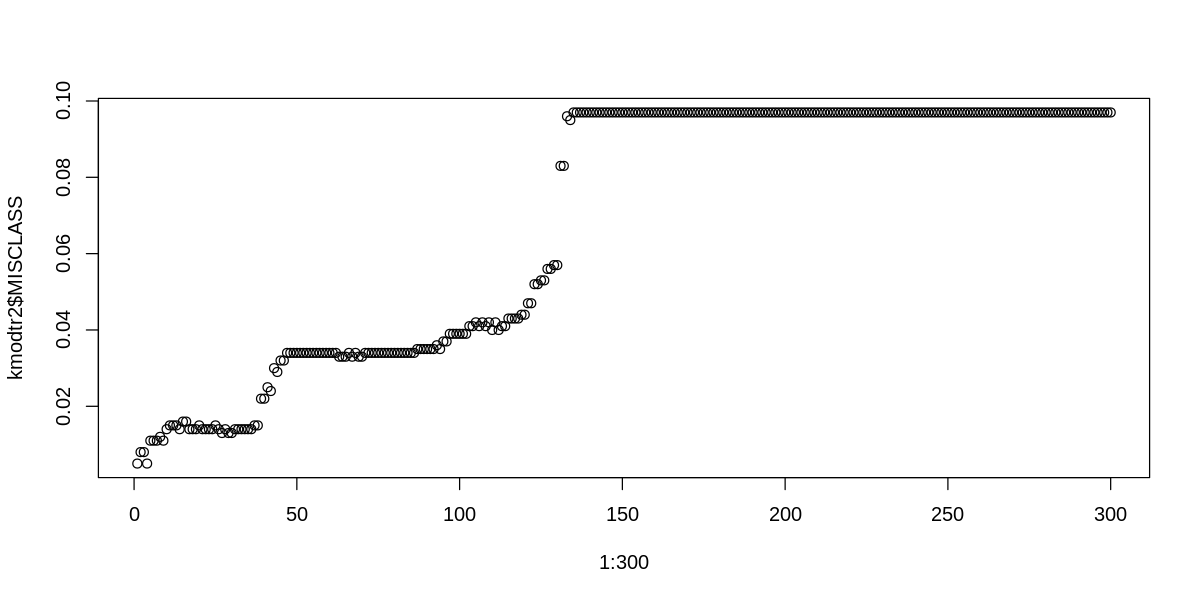

In [206]:
kmodtr2
prediction = predict(kmodtr2, testData)
plot(1:300,kmodtr2$MISCLASS)

In [207]:
confusionMatrix(prediction,testData$V1,positive='1')

Confusion Matrix and Statistics

          Reference
Prediction   -1    1
        -1  653   22
        1    12 5477
                                          
               Accuracy : 0.9945          
                 95% CI : (0.9923, 0.9962)
    No Information Rate : 0.8921          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9715          
                                          
 Mcnemar's Test P-Value : 0.1227          
                                          
            Sensitivity : 0.9960          
            Specificity : 0.9820          
         Pos Pred Value : 0.9978          
         Neg Pred Value : 0.9674          
             Prevalence : 0.8921          
         Detection Rate : 0.8885          
   Detection Prevalence : 0.8905          
      Balanced Accuracy : 0.9890          
                                          
       'Positive' Class : 1               
                        

In [208]:
(sum(testData$V1=='-1')-confusionMatrix(prediction,testData$V1,positive='1')$table[2])/sum(testData$V1=='-1')

[1] 0.9819549

In [209]:
trainData = read.table("Wafer_TRAIN.txt", header = FALSE, sep = "", dec = ".")
testData = read.table("Wafer_TEST.txt", header = FALSE, sep = "", dec = ".") #reading txt files to data frame

trainData$V1 = as.factor(trainData$V1)
testData$V1 = as.factor(testData$V1) #convert response variable to be categorical nominal

nb = naive_bayes(V1~., trainData,usekernel = TRUE)
prediction = predict(nb,testData[-1])

confusionMatrix(prediction,testData$V1,positive='1')

Confusion Matrix and Statistics

          Reference
Prediction   -1    1
        -1  462  586
        1   203 4913
                                          
               Accuracy : 0.872           
                 95% CI : (0.8634, 0.8802)
    No Information Rate : 0.8921          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.4694          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8934          
            Specificity : 0.6947          
         Pos Pred Value : 0.9603          
         Neg Pred Value : 0.4408          
             Prevalence : 0.8921          
         Detection Rate : 0.7970          
   Detection Prevalence : 0.8300          
      Balanced Accuracy : 0.7941          
                                          
       'Positive' Class : 1               
                        

In [210]:
(sum(testData$V1=='-1')-confusionMatrix(prediction,testData$V1,positive='1')$table[2])/sum(testData$V1=='-1')

[1] 0.6947368

Maybe the first 5 variables are all that is needed. We could also test different rescaling methods. Class imbalance

In [ ]:
%%shell
jupyter nbconvert --to html /content/DAT301Project2.ipynb